## Movie Review Analysis Assignment

**Problem Statement:**

This assignment aims to develop your understanding of text analysis techniques, specifically in the context of movie reviews. By analyzing a corpus of movie reviews, you will learn how to extract meaningful insights, identify sentiment (positive, negative, or neutral), and potentially uncover trends or patterns in audience opinions. This exercise will enhance your skills in natural language processing (NLP), data analysis, and critical thinking about how language reflects subjective experiences. Ultimately, it will provide a practical understanding of how computational methods can be applied to understand and interpret human language data.

**Step-by-Step Approach:**

This assignment can be approached in the following steps:

1.  **Data Acquisition and Preparation:**
    * Obtain the movie review dataset (e.g., from a provided source or a publicly available dataset).
    * Explore the dataset to understand its structure, features (e.g., review text, rating), and size.
    * Perform necessary data cleaning steps, which might include:
        * Handling missing values.
        * Removing irrelevant information (e.g., metadata not directly related to the review content).
        * Potentially tokenizing the text (breaking it down into individual words or units).

2.  **Text Preprocessing:**
    * Apply various NLP techniques to prepare the text data for analysis. This might involve:
        * Lowercasing all text.
        * Removing punctuation and special characters.
        * Handling stop words (common words like "the," "a," "is" that often don't carry significant meaning).
        * Stemming or lemmatization (reducing words to their root form).

3.  **Feature Engineering (Optional but Recommended):**
    * Create meaningful features from the preprocessed text data. This could involve:
        * **Bag-of-Words (BoW) or TF-IDF (Term Frequency-Inverse Document Frequency):** Representing reviews as numerical vectors based on word occurrences or importance.
        * **N-grams:** Considering sequences of words to capture contextual information.
        * **Sentiment Lexicon Scores:** Using predefined dictionaries of words associated with positive or negative sentiment.

4.  **Sentiment Analysis (Core Task):**
    * Implement or utilize techniques to determine the sentiment expressed in each movie review. Common approaches include:
        * **Lexicon-based methods:** Using sentiment dictionaries to score reviews based on the polarity of words.
        * **Machine learning classifiers:** Training models (e.g., Naive Bayes, Support Vector Machines, Logistic Regression) on labeled data to predict sentiment.

5.  **Analysis and Interpretation:**
    * Analyze the results of your sentiment analysis. This might involve:
        * Calculating the overall sentiment distribution (percentage of positive, negative, and neutral reviews).
        * Identifying movies with the most positive or negative sentiment.
        * Exploring relationships between review text and other features (e.g., ratings, if available).
        * Investigating specific words or phrases that are strongly associated with positive or negative sentiment.

6.  **Visualization (Optional but Enhances Understanding):**
    * Create visual representations of your findings, such as:
        * Histograms or bar charts showing sentiment distribution.
        * Word clouds highlighting frequently occurring positive or negative words.
        * Scatter plots to explore relationships between variables.

7.  **Report Writing:**
    * Document your entire process, including:
        * A clear explanation of the problem statement and your approach.
        * Details of the data used and preprocessing steps.
        * Description of the sentiment analysis techniques employed.
        * Presentation and interpretation of your findings, supported by visualizations if created.
        * A discussion of any challenges encountered and potential improvements.

By following these steps, you will gain a comprehensive understanding of how to analyze movie reviews and extract valuable insights from textual data. Good luck!

In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB

from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import (
    ConfusionMatrixDisplay, 
     classification_report, 
    confusion_matrix,
    accuracy_score, 
    f1_score
)

import string

# Download NLTK resources (only once needed)
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

## Data Loading and Basic Exploration
This section is responsible for loading the dataset and taking a first look at it. Understanding the structure, number of reviews, and sentiment distribution is critical before any preprocessing.


In [2]:
df = pd.read_csv("IMDB Dataset.csv")
df = df.sample(10000).reset_index(drop=True)

# Encode sentiment labels
df["sentiment"] = df["sentiment"].map({"positive": 1, "negative": 0})

## Text Cleaning & Preprocessing
1. Sample rows 10000
2. Remove html tags
3. Remove Special characters
4. Converting whole text into lower-case
5. Remove Stop words
6. Steming

In [3]:
df.shape

(10000, 2)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     10000 non-null  object
 1   sentiment  10000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 156.4+ KB


In [5]:
df.head()

,review,sentiment
0,"This is the best movie ever, but that is my op...",1
1,This is a typical college comedy and its very ...,0
2,The Fluffer may have strong elements of porn i...,0
3,Interesting story and sympathetic treatment of...,1
4,Well to do American divorcée with more money t...,0


In [6]:
import re
clean = re.compile("<.*?>")
re.sub(clean, "",df.iloc[2].review)

"The Fluffer may have strong elements of porn industry truth to it - but that doesn't make up for the fact that it's pretty shabbily directed and acted - and with a very mediocre script.B grade from start to the exceedingly drawn out finish.It would be embarassing to think of the general public being offered this piece as an example of state of the art gay film making.Hopefully it has a limited life in the gay film festival circuit and is allowed to die a natural death on video.This film will open the Queer Film Weekend in Brisbane on April 10, 2002. I think its success there will be strongly influenced by the amount of alcohol consumed in the preceding cocktail party - they're gonna need it."

In [7]:
# Function to Clean HTML Tags
def clean_html(text):
    clean = re.compile("<.*?>")
    return re.sub(clean, "", text)

In [8]:
df["review"] = df["review"].apply(clean_html)

In [9]:
# Converting review into lower-case
def convert_lower(text):
    return text.lower()

In [10]:
df["review"] = df["review"].apply(convert_lower)

In [11]:
# Function to remove special character
def remove_special(text):
    x = ""
    for i in text:
        if i.isalnum():
            x = x+i
        else:
            x = x + " "
    return x

In [12]:
remove_special("the movie was @we$ome. !t w@s great")

'the movie was  we ome   t w s great'

In [13]:
df["review"] = df["review"].apply(remove_special)

In [14]:
df["review"][6894]

'i saw this film because calexico did the score  a real disappointment  annoying  trendy scenes  with urban hipsters and their cliche hip lifestyles  cheesy stereotypical mexican border culture  mystic grandfather with the rattlesnake and potions  granddaughter in her mariachi style restaurant getup   a few laughs  but hipper than thou  and sorely lacking in vision and basic filmmaking talent '

In [15]:
# Remove Stop words
import nltk
from nltk.corpus import stopwords

In [16]:
stopwords.words("english")

['a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 'her',
 'here',
 'hers',
 'herself',
 "he's",
 'him',
 'himself',
 'his',
 'how',
 'i',
 "i'd",
 'if',
 "i'll",
 "i'm",
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it'd",
 "it'll",
 "it's",
 'its',
 'itself',
 "i've",
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'on

In [17]:
def remove_stopwords(text):
    x = []
    for i in text.split():
        if i not in stopwords.words("english"):
            x.append(i)
    y = x[:]
    x.clear()
    return y

In [18]:
df["review"] = df["review"].apply(remove_stopwords)

In [19]:
df["review"][6894]

['saw',
 'film',
 'calexico',
 'score',
 'real',
 'disappointment',
 'annoying',
 'trendy',
 'scenes',
 'urban',
 'hipsters',
 'cliche',
 'hip',
 'lifestyles',
 'cheesy',
 'stereotypical',
 'mexican',
 'border',
 'culture',
 'mystic',
 'grandfather',
 'rattlesnake',
 'potions',
 'granddaughter',
 'mariachi',
 'style',
 'restaurant',
 'getup',
 'laughs',
 'hipper',
 'thou',
 'sorely',
 'lacking',
 'vision',
 'basic',
 'filmmaking',
 'talent']

In [20]:

lemmatizer = WordNetLemmatizer()
y = []

def lemmatize_words(text):
    for i in text:
        y.append(lemmatizer.lemmatize(i))
    z = y[:]
    y.clear()
    return z


In [21]:
df["review"] = df["review"].apply(lemmatize_words)

In [22]:
# Join back
def join_back(list_input):
    return " ".join(list_input)

In [23]:
df["review"] = df["review"].apply(join_back)

In [24]:
df["review"][6894]

'saw film calexico score real disappointment annoying trendy scene urban hipster cliche hip lifestyle cheesy stereotypical mexican border culture mystic grandfather rattlesnake potion granddaughter mariachi style restaurant getup laugh hipper thou sorely lacking vision basic filmmaking talent'

In [25]:
# X = df.iloc[:,0:1].values
X = df['review'].tolist()


In [26]:
X

['best movie ever opinion say cheesy think truly beautiful film chemistry jennifer grey patrick swayze like ever seen make film perfect always wonder would film two actor never existed one never seen film understand mean dirty dancing look like done heart feel real reason like magic soundtrack love besides 2 lead actor soundtrack make film beauty tell love film know',
 'typical college comedy average story ok entertaining unlucky guy named reno loos job get car ripped uncle dy stripbar got girlfriend though nice one btw anyway uncle give mansion la mercedes heritage soon reno girlfriend move la new house problem would need roommate order pay high rent house film unfolds movie start ok funny joke suddenly movie take turn straight hell ending bad really bad destroys everything movie know talking see movie 2 10',
 'fluffer may strong element porn industry truth make fact pretty shabbily directed acted mediocre script b grade start exceedingly drawn finish would embarassing think general p

### Feature Extraction using TF-IDF
TF-IDF converts textual data into numerical form by emphasizing words that are important in a document but not frequent across all documents.

**Why use TF-IDF?**  
- Helps highlight key sentiment words.
- Reduces the weight of common, non-informative words (like “the”, “movie”).

**Limitations:**  
- Does not capture context or word order.



In [27]:

tfvec = TfidfVectorizer(max_features=1000)

In [28]:
X = tfvec.fit_transform(df["review"]).toarray()

In [29]:
X

array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.09700315, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.12077318, 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]])

In [30]:
X.shape

(10000, 1000)

In [31]:
X[0].max()

0.35993997018572643

In [32]:
y = df.iloc[:,-1].values

In [33]:
y.shape

(10000,)

In [34]:
# X, y
# Training Set
# Testing Set (already know the result) train result compare with test set then we'll get accuracy

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [35]:
X_train.shape

(8000, 1000)

In [36]:
X_test.shape

(2000, 1000)

In [37]:
y_train.shape

(8000,)

In [38]:
y_test.shape

(2000,)

### Model Training and Evaluation
In this section, we train and evaluate multiple machine learning models: Naive Bayes, Logistic Regression, and Support Vector Machine (SVM).

**Why multiple models?**  
Trying different models helps identify which algorithm performs best on sentiment analysis.

#### Naive Bayes:
- Based on Bayes Theorem with strong independence assumptions.
- **Pros:** Fast, works well with TF-IDF, good baseline.
- **Cons:** Assumes features are independent, which isn’t always true.

#### Logistic Regression:
- A linear classifier ideal for binary classification (positive vs negative).
- **Pros:** Interpretable, performs well with TF-IDF.
- **Cons:** May not handle non-linear relationships as well.

#### SVM (Support Vector Machine):
- Tries to find a hyperplane that best separates the classes.
- **Pros:** Often performs well in high-dimensional spaces like text.
- **Cons:** Slower to train, especially with large datasets.



In [39]:

gNB = GaussianNB()
mNB = MultinomialNB()
bNB = BernoulliNB()

In [40]:
gNB.fit(X_train, y_train)
mNB.fit(X_train, y_train)
bNB.fit(X_train, y_train)

BernoulliNB()

In [41]:
y_pred1 = gNB.predict(X_test)
y_pred2 = mNB.predict(X_test)
y_pred3 = bNB.predict(X_test)

In [56]:
gaussian_NB_acc= accuracy_score(y_test, y_pred1)
multinomial_NB_acc= accuracy_score(y_test, y_pred2)
bernoulli_NB_acc= accuracy_score(y_test, y_pred3)

In [51]:
gaussian_NB_f1 = f1_score(y_test, y_pred1)
multinomial_NB_f1 = f1_score(y_test, y_pred2)
bernoulli_NB_f1 = f1_score(y_test, y_pred3)

In [57]:
print("Naive Bayes:")


print("Gaussian NB =  " ,gaussian_NB_acc)
print("Multinomial NB = " ,multinomial_NB_acc)
print("Bernoulli NB = " ,bernoulli_NB_acc)
print("Multinomial NB F1 Score:", multinomial_NB_f1)

Naive Bayes:
Gaussian NB =   0.809
Multinomial NB =  0.842
Bernoulli NB =  0.8365
Multinomial NB F1 Score: 0.8477842003853564


In [44]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

In [45]:
lr_acc = accuracy_score(y_test, lr_pred)
lr_f1 = f1_score(y_test, lr_pred)

In [46]:
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("F1 Score:", lr_f1)

Logistic Regression:
Accuracy: 0.858
F1 Score: 0.8621359223300971


In [47]:
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)
svm_pred = svm_model.predict(X_test)

In [48]:
svm_acc = accuracy_score(y_test, svm_pred)
svm_f1 = f1_score(y_test, svm_pred)

print("\nSupport Vector Machine:")
print("Accuracy:", svm_acc)
print("F1 Score:", svm_f1)


Support Vector Machine:
Accuracy: 0.851
F1 Score: 0.8553398058252427


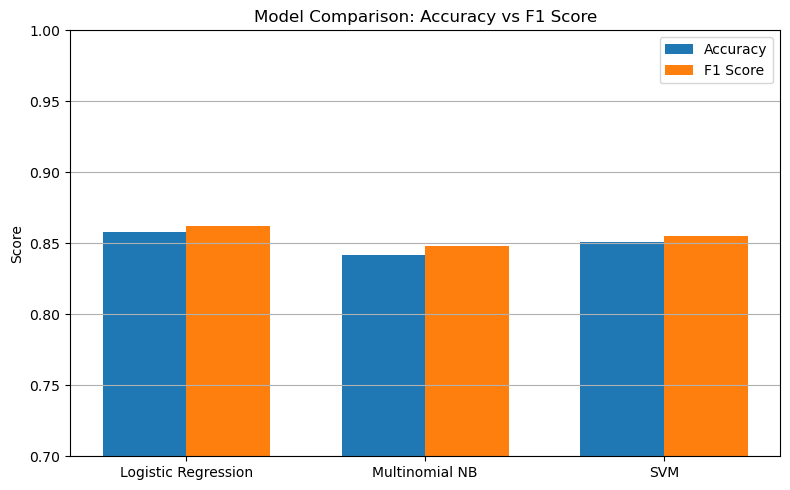

In [58]:
# Model names and their scores
models = ['Logistic Regression', 'Multinomial NB', 'SVM']
accuracies = [lr_acc, multinomial_NB_acc, svm_acc]
f1_scores = [lr_f1, multinomial_NB_f1, svm_f1]

# Define bar positions
x = np.arange(len(models))
width = 0.35  # width of the bars

plt.figure(figsize=(8, 5))

# Plot side-by-side bars
plt.bar(x - width/2, accuracies, width, label='Accuracy')
plt.bar(x + width/2, f1_scores, width, label='F1 Score')

# Customizing the plot
plt.xticks(x, models)
plt.ylim(0.7, 1.0)
plt.ylabel("Score")
plt.title("Model Comparison: Accuracy vs F1 Score")
plt.legend()
plt.grid(axis='y')
plt.tight_layout()
plt.show()


### Word Clouds for Sentiment Visualization

To better understand the most frequent words used in positive and negative reviews, we generate separate word clouds.

This visualization helps us intuitively observe patterns or common terms used in each sentiment category. For instance, positive reviews might use terms like *"amazing"*, *"great"*, or *"love"*, while negative ones might include *"boring"*, *"worst"*, or *"disappointed"*.

These insights can also guide future improvements in preprocessing or feature selection.


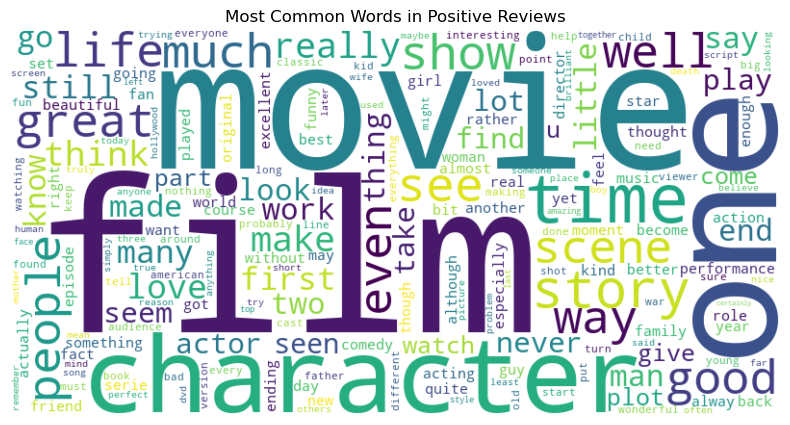

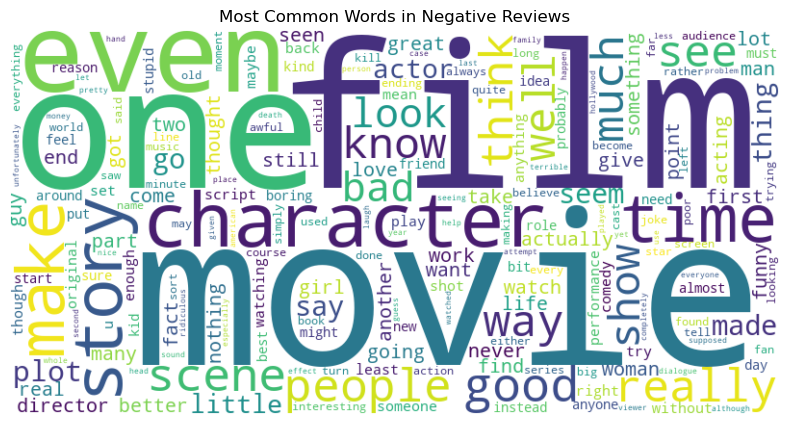

In [61]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Positive Reviews Word Cloud
positive_text = ' '.join(df[df['sentiment'] == 1]['review'])
wordcloud_pos = WordCloud(width=800, height=400, background_color='white').generate(positive_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_pos, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Positive Reviews")
plt.show()

# Negative Reviews Word Cloud
negative_text = ' '.join(df[df['sentiment'] == 0]['review'])
wordcloud_neg = WordCloud(width=800, height=400, background_color='white').generate(negative_text)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_neg, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Negative Reviews")
plt.show()



### Confusion Matrices for Model Evaluation

Confusion matrices provide a detailed breakdown of each model's performance by showing the number of true positives, true negatives, false positives, and false negatives.

They help us visually understand how well each model is distinguishing between positive and negative reviews, and where misclassifications occur.


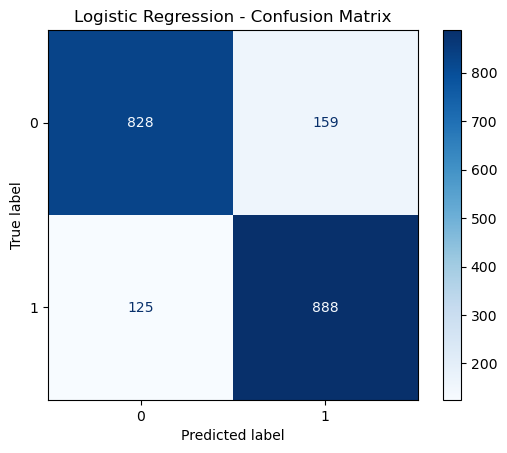

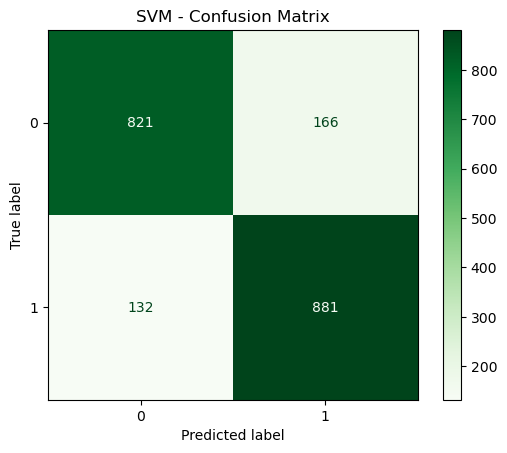

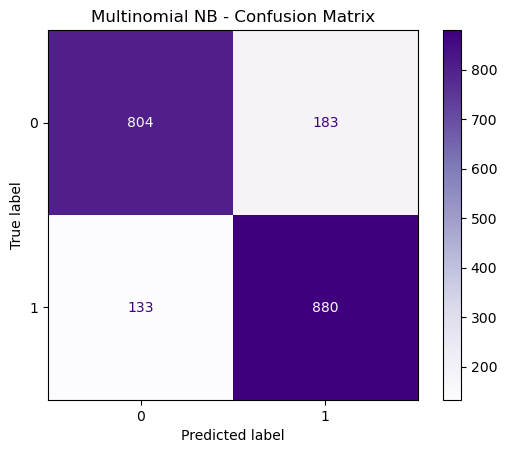

In [68]:
# Logistic Regression
ConfusionMatrixDisplay.from_predictions(y_test, lr_pred, cmap='Blues')
plt.title("Logistic Regression - Confusion Matrix")
plt.grid(False)
plt.show()

# SVM
ConfusionMatrixDisplay.from_predictions(y_test, svm_pred, cmap='Greens')
plt.title("SVM - Confusion Matrix")
plt.grid(False)
plt.show()

# Multinomial Naive Bayes
ConfusionMatrixDisplay.from_predictions(y_test, y_pred2, cmap='Purples')
plt.title("Multinomial NB - Confusion Matrix")
plt.grid(False)
plt.show()
